In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
np.random.seed(1000)

In [5]:
# (3) Create a sequential model
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))


# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam',\
 metrics=['accuracy'])



In [7]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\Asus-2020\\Downloads\\Cat and Dog\\test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

r=model.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 50,
                         validation_data = test_set,    
                         validation_steps = len(test_set))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Epoch 1/50
501/501 [==============================] - 97s 194ms/step - loss: 0.8948 - accuracy: 0.5273 - val_loss: 0.8051 - val_accuracy: 0.4953
Epoch 2/50
501/501 [==============================] - 89s 178ms/step - loss: 0.7443 - accuracy: 0.5317 - val_loss: 0.6870 - val_accuracy: 0.5502
Epoch 3/50
501/501 [==============================] - 90s 179ms/step - loss: 0.7358 - accuracy: 0.5408 - val_loss: 0.6939 - val_accuracy: 0.5536
Epoch 4/50
501/501 [==============================] - 90s 179ms/step - loss: 0.7240 - accuracy: 0.5492 - val_loss: 0.7512 - val_accuracy: 0.5037
Epoch 5/50
501/501 [==============================] - 91s 182ms/step - loss: 0.7341 - accuracy: 0.5369 - val_loss: 0.7140 - val_accuracy: 0.5872
Epoch 6/50
501/501 [==============================] - 90s 180ms/step - loss: 0.7238 - accuracy: 0.5518 - val_loss: 0.7939 - val_accuracy: 0.5823
Epoch 7/50
501/501 [==========================

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)        

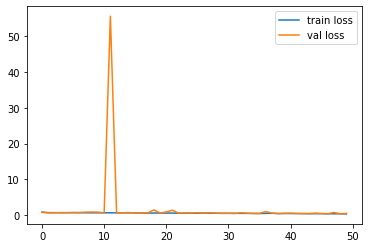

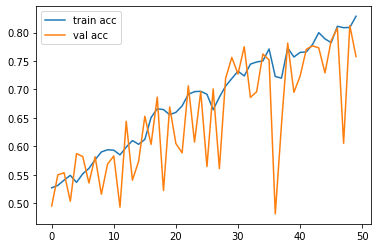

<Figure size 432x288 with 0 Axes>

In [9]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\Asus-2020\Downloads\\Cat and Dog\\test\\cats\\cat.4488.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
#training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'Cat'
    print(prediction)
else:
    prediction = 'Dog'
    print(prediction)

[[1. 0.]]
Cat
